In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"]=["SimHei"]


# 一元线性回归


In [1]:
#加载数据
x=np.array([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
y=np.array([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])
#设置超参数
learn_rate=0.0001
iter=10
display_step=1
#设置模型参数初值
np.random.seed(612)
w=tf.Variable(np.random.randn())#randn函数返回一个或一组样本，具有标准正态分布
b=tf.Variable(np.random.randn())
#训练模型
mse=[]

for i in range(0,iter+1):
    
    with tf.GradientTape() as tape:
        pred=w*x+b
        Loss=tf.reduce_mean(tf.square(y-pred))/2
    mse.append(Loss)   
    
    dL_dw,dL_db=tape.gradient(Loss,[w,b])
    
    w.assign_sub(learn_rate*dL_dw)
    b.assign_sub(learn_rate*dL_db)
    
   
    
    
    if i%display_step==0:
        print("i:%i, Loss:%f, w:%f, b:%f "%(i,Loss,w.numpy(),b.numpy()))

NameError: name 'np' is not defined

# 多元线性回归

In [11]:
#加载数据
area=np.array([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
room=np.array([3,2,2,3,1,2,3,2,2,3,1,1,1,1,2,2])
price=np.array([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])
num=len(area)

x0=np.ones(num)
#线性归一化
x1=(area-area.min())/(area.max()-area.min())
x2=(room-room.min())/(room.max()-room.min())

X=np.stack((x0,x1,x2),axis=1)
Y=price.reshape(-1,1)

#设置超参数
learn_rate=0.2
iter=50
display_step=10
#设置模型参数初始值
np.random.seed(612)
W=tf.Variable(np.random.randn(3,1))#randn函数返回一个或一组样本，具有标准正态分布

#训练模型
mse=[]

for i in range(0,iter+1):
    
    with tf.GradientTape() as tape:#PRED=np.matmul(X,W)
        PRED=X@W
        Loss=tf.reduce_mean(tf.square(Y-PRED))/2
    mse.append(Loss)
    
    dL_dW=tape.gradient(Loss,W)
    W.assign_sub(learn_rate*dL_dW)

    if i%display_step==0:
        print("i:%i, Loss:%f "%(i,Loss))

i:0, Loss:4593.851656 
i:10, Loss:85.480869 
i:20, Loss:82.080953 
i:30, Loss:81.408948 
i:40, Loss:81.025841 
i:50, Loss:80.803450 


# 波士顿房价预测：一元线性回归

In [63]:
#加载数据集
boston_housing=tf.keras.datasets.boston_housing
(train_x,train_y),(test_x,test_y)=boston_housing.load_data()

x_train=train_x[:,5]
y_train=train_y
x_test=test_x[:,5]
y_test=test_y

#设置超参数
learn_rate=0.04
iter=2000
display_step=200
#设置模型参数初值
np.random.seed(612)
w=tf.Variable(np.random.randn())#randn函数返回一个或一组样本，具有标准正态分布
b=tf.Variable(np.random.randn())
#训练模型
mse_train=[]
mse_test=[]

for i in range(0,iter+1):
    
    with tf.GradientTape() as tape:
        pred_train=w*x_train+b
        Loss_train=tf.reduce_mean(tf.square(y_train-pred_train))/2
        pred_test=w*x_test+b
        Loss_test=tf.reduce_mean(tf.square(y_test-pred_test))/2
    mse_train.append(Loss_train)
    mse_test.append(Loss_test)   
    
    dL_dw,dL_db=tape.gradient(Loss_train,[w,b])
    
    w.assign_sub(learn_rate*dL_dw)
    b.assign_sub(learn_rate*dL_db)
    
   
    
    
    if i%display_step==0:
        print("i:%i, Loss_train:%f, Loss_test:%f "%(i,Loss_train,Loss_test))

i:0, Loss_train:321.837585, Loss_test:337.568634 
i:200, Loss_train:28.122614, Loss_test:26.237764 
i:400, Loss_train:27.144739, Loss_test:25.099327 
i:600, Loss_train:26.341949, Loss_test:24.141077 
i:800, Loss_train:25.682899, Loss_test:23.332981 
i:1000, Loss_train:25.141851, Loss_test:22.650158 
i:1200, Loss_train:24.697672, Loss_test:22.072006 
i:1400, Loss_train:24.333025, Loss_test:21.581436 
i:1600, Loss_train:24.033665, Loss_test:21.164261 
i:1800, Loss_train:23.787905, Loss_test:20.808697 
i:2000, Loss_train:23.586145, Loss_test:20.504938 


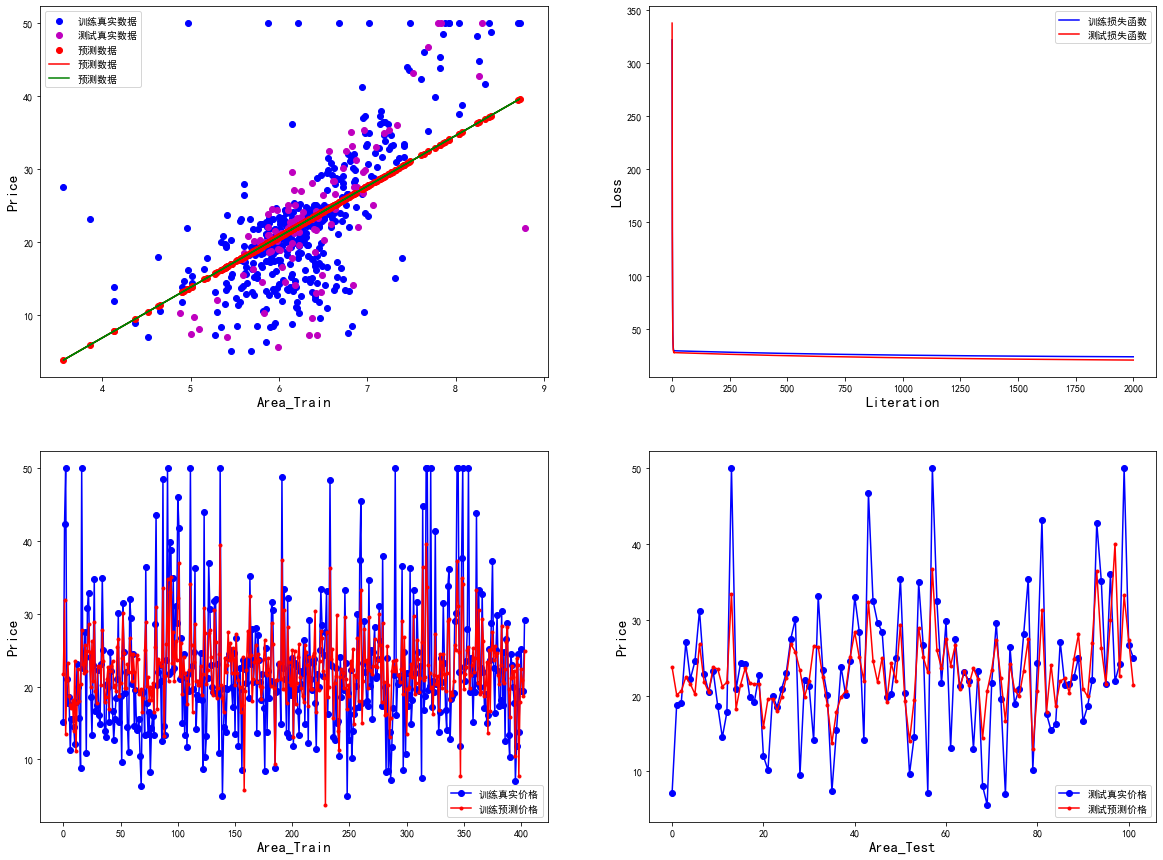

In [69]:
# 可视化
plt.figure(figsize=(20,15))

plt.subplot(221)
plt.scatter(x_train,y_train,color="b",label="训练真实数据")
plt.scatter(x_test,y_test,color="m",label="测试真实数据")
plt.scatter(x_train,pred_train,color="r",label="预测数据")
plt.plot(x_train,pred_train,color="r",label="预测数据")
plt.plot(x_train,w*x_train+b,color="g",label="预测数据")
plt.xlabel("Area_Train",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.legend()

plt.subplot(222)
plt.plot(mse_train,color="b",label="训练损失函数")
plt.plot(mse_test,color="r",label="测试损失函数")
plt.xlabel("Literation",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.legend()

plt.subplot(223)
plt.plot(y_train,color="b",marker="o",label="训练真实价格")
plt.plot(pred_train,color="r",marker=".",label="训练预测价格")
plt.xlabel("Area_Train",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.legend()

plt.subplot(224)
plt.plot(y_test,color="b",marker="o",label="测试真实价格")
plt.plot(pred_test,color="r",marker=".",label="测试预测价格")
plt.xlabel("Area_Test",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.legend()

plt.show()

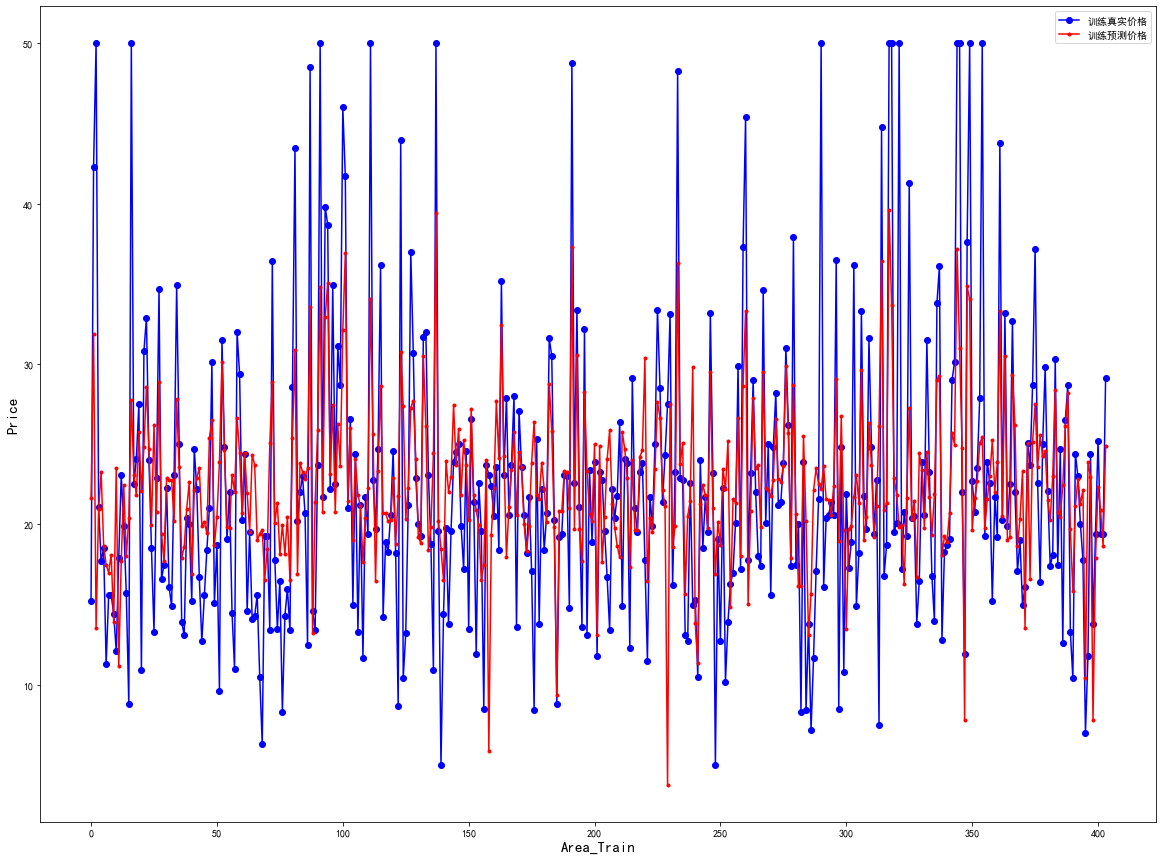

In [78]:
plt.figure(figsize=(20,15))
plt.plot(y_train,color="b",marker="o",label="训练真实价格")
plt.plot(pred_train,color="r",marker=".",label="训练预测价格")
plt.xlabel("Area_Train",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.legend()
plt.show()

# 波士顿房价预测：多元线性回归

In [133]:
#二维数组归一化：循环实现
#加载数据集
boston_housing=tf.keras.datasets.boston_housing
(train_x,train_y),(test_x,test_y)=boston_housing.load_data()

In [134]:
#二维数组归一化：循环实现
x=np.array([[3,10,500],[2,20,200],[1,30,300],[5,50,100]])
x

array([[  3,  10, 500],
       [  2,  20, 200],
       [  1,  30, 300],
       [  5,  50, 100]])

In [135]:
len(x),    x.shape[0],    x.shape[1]

(4, 4, 3)

for i in range(x.shape[1]):
    x[:,i]=(x[:,i]-x[:,i].min(axis=0))/(x[:,i].max(axis=0)-x[:,i].min(axis=0))
x

In [125]:
(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))

array([[0.5 , 0.  , 1.  ],
       [0.25, 0.25, 0.25],
       [0.  , 0.5 , 0.5 ],
       [1.  , 1.  , 0.  ]])

In [3]:
#加载数据集
boston_housing=tf.keras.datasets.boston_housing
(train_x,train_y),(test_x,test_y)=boston_housing.load_data()

num_train=len(train_x)
num_test=len(test_y)

x0_train=np.ones(num_train).reshape(-1,1)
x0_test=np.ones(num_test).reshape(-1,1)
#线性归一化
#(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))
x_train=(train_x-train_x.min(axis=0))/(train_x.max(axis=0)-train_x.min(axis=0))
y_train=train_y
x_test=(test_x-test_x.min(axis=0))/(test_x.max(axis=0)-test_x.min(axis=0))
y_test=test_y
#拼接
X_train=tf.cast(tf.concat([x0_train,x_train],axis=1),tf.float32)#注意精确度,下同
X_test=tf.cast(tf.concat([x0_test,x_test],axis=1),tf.float32)
Y_train=tf.cast(y_train.reshape(-1,1),tf.float32)
Y_test=tf.cast(y_test.reshape(-1,1),tf.float32)
#设置超参数
learn_rate=0.01
iter=2000
display_step=200
#设置模型参数初始值
np.random.seed(612)
W=tf.Variable(np.random.randn(14,1),dtype=tf.float32)#randn函数返回一个或一组样本，具有标准正态分布

#训练模型
mse_train=[]
mse_test=[]

for i in range(0,iter+1):
    
    with tf.GradientTape() as tape:
        PRED_train=X_train@W
        PRED_test=X_test@W
        Loss_train=tf.reduce_mean(tf.square(Y_train-PRED_train))/2
        Loss_test=tf.reduce_mean(tf.square(Y_test-PRED_test))/2
    mse_train.append(Loss_train)
    mse_test.append(Loss_test)
    
    dL_dW=tape.gradient(Loss_train,W)#
    W.assign_sub(learn_rate*dL_dW)

    if i%display_step==0:
        print("i:%i, Train Loss:%f, Test_loss:%f "%(i,Loss_train,Loss_test))

i:0, Train Loss:263.193451, Test_loss:276.994110 
i:200, Train Loss:36.176552, Test_loss:37.562954 
i:400, Train Loss:28.789461, Test_loss:28.952513 
i:600, Train Loss:25.520697, Test_loss:25.333918 
i:800, Train Loss:23.460527, Test_loss:23.340536 
i:1000, Train Loss:21.887274, Test_loss:22.039745 
i:1200, Train Loss:20.596289, Test_loss:21.124844 
i:1400, Train Loss:19.510202, Test_loss:20.467239 
i:1600, Train Loss:18.587011, Test_loss:19.997719 
i:1800, Train Loss:17.797461, Test_loss:19.671591 
i:2000, Train Loss:17.118929, Test_loss:19.456861 


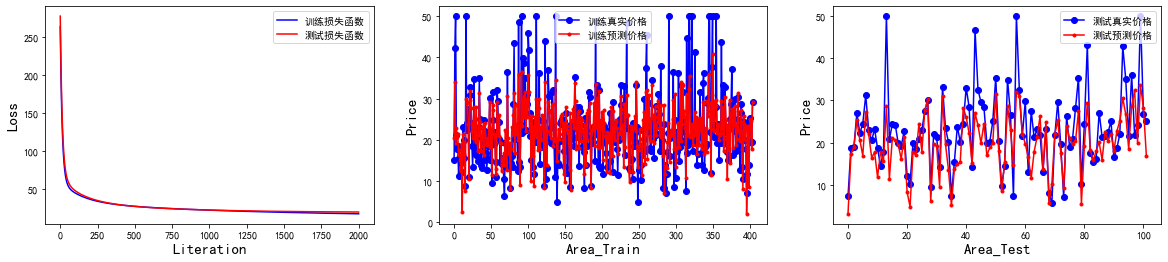

In [5]:
# 可视化
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.plot(mse_train,color="b",label="训练损失函数")
plt.plot(mse_test,color="r",label="测试损失函数")
plt.xlabel("Literation",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.legend()

plt.subplot(132)
plt.plot(y_train,color="b",marker="o",label="训练真实价格")
plt.plot(PRED_train,color="r",marker=".",label="训练预测价格")
plt.xlabel("Area_Train",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.legend()

plt.subplot(133)
plt.plot(y_test,color="b",marker="o",label="测试真实价格")
plt.plot(PRED_test,color="r",marker=".",label="测试预测价格")
plt.xlabel("Area_Test",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.legend()

plt.show()

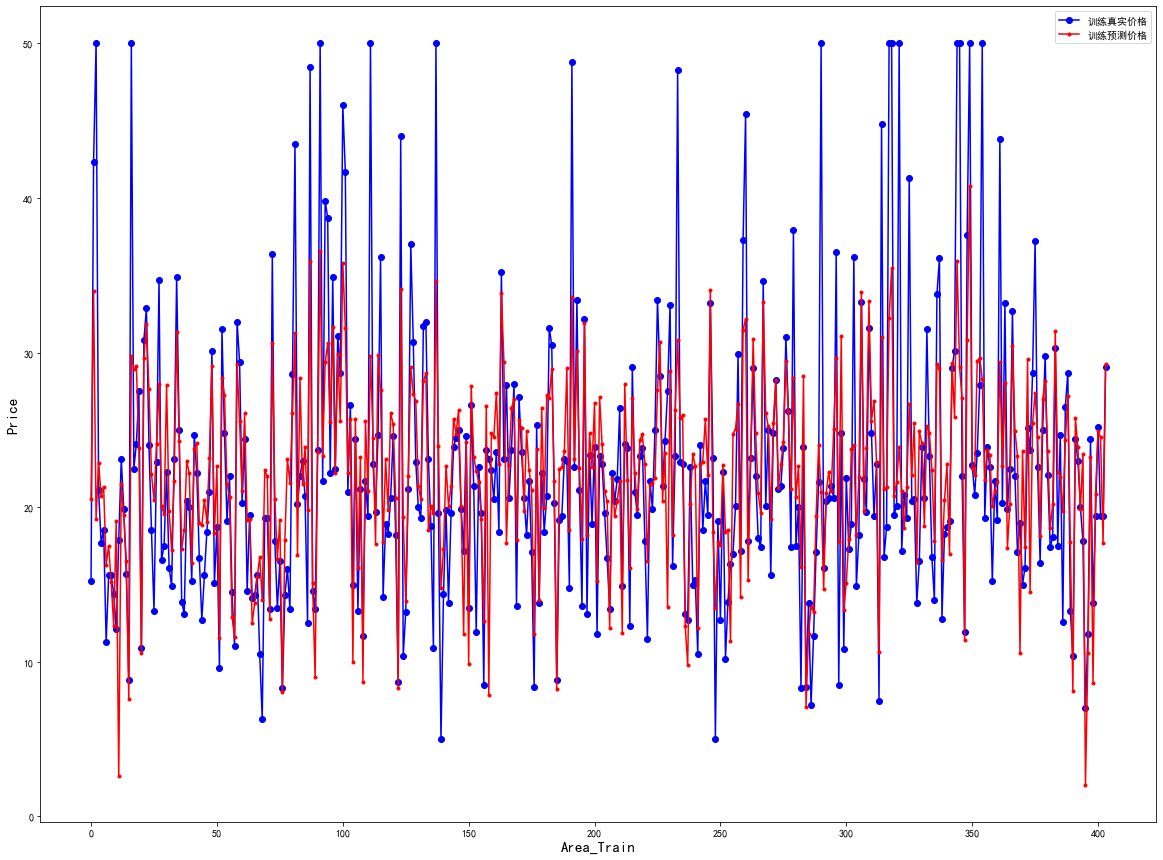

In [6]:
plt.figure(figsize=(20,15))
plt.plot(y_train,color="b",marker="o",label="训练真实价格")
plt.plot(PRED_train,color="r",marker=".",label="训练预测价格")
plt.xlabel("Area_Train",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.legend()
plt.show()